<a href="https://colab.research.google.com/github/KristineYW/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Build_Week_1_LE_Vis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [123]:
ch_mort = pd.read_csv('https://raw.githubusercontent.com/KristineYW/Unit-1-Build/master/NCHS_-_Childhood_Mortality_Rates.csv', names=['Year','Age Group','Death Rate'])

ch_mort.tail()

,Year,Age Group,Death Rate
468,2013,15-19 Years,44.8
469,2014,15-19 Years,45.5
470,2015,15-19 Years,48.3
471,2016,15-19 Years,51.2
472,2017,15-19 Years,51.5


In [124]:
ch_mort.describe(include='all')

,Year,Age Group,Death Rate
count,473,473,473
unique,119,5,429
top,1917,1-4 Years,25.3
freq,4,118,3


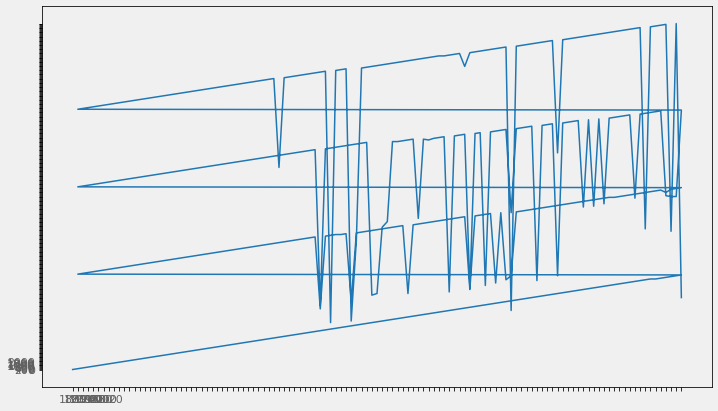

In [125]:
fig, ax = plt.subplots(figsize=(12, 7))

ax.set_yticklabels([0,200,400,600,800,1000,1200,1400,1600,1800,2000], color='#616161', fontsize=11)
ax.set_xticklabels([1880,1900,1920,1940,1960,1980,2000,2020], color='#616161', fontsize=11)

fig.set_facecolor('#f0f0f0')
ax.set_facecolor('#f0f0f0')

ax.plot(ch_mort['Year'],ch_mort['Death Rate']);

In [126]:
ch_mort_p = ch_mort.pivot(index='Year', columns='Age Group', values='Death Rate')

ch_mort_p = ch_mort_p.drop(['Age Group'],axis=1)

ch_mort_p = ch_mort_p[['1-4 Years','5-9 Years','10-14 Years','15-19 Years']]

ch_mort_p.head()

Age Group,1-4 Years,5-9 Years,10-14 Years,15-19 Years
Year,,,,
1900,"1,983.8",466.1,298.3,484.8
1901,"1,695.0",427.6,273.6,454.4
1902,"1,655.7",403.3,252.5,421.5
1903,"1,542.1",414.7,268.2,434.1
1904,"1,591.5",425.0,305.2,471.4


In [127]:
dr_le = pd.read_csv('https://raw.githubusercontent.com/KristineYW/Unit-1-Build/master/NCHS_-_Death_rates_and_life_expectancy_at_birth.csv')

dr_le.head()

,Year,Race,Sex,Average Life Expectancy (Years),Age-adjusted Death Rate
0,1900,All Races,Both Sexes,47.3,"2,518.0"
1,1901,All Races,Both Sexes,49.1,"2,473.1"
2,1902,All Races,Both Sexes,51.5,"2,301.3"
3,1903,All Races,Both Sexes,50.5,"2,379.0"
4,1904,All Races,Both Sexes,47.6,"2,502.5"


In [128]:
dr_le_all = dr_le.drop(['Race', 'Age-adjusted Death Rate'], axis=1)

dr_le_all.head(10)

,Year,Sex,Average Life Expectancy (Years)
0,1900,Both Sexes,47.3
1,1901,Both Sexes,49.1
2,1902,Both Sexes,51.5
3,1903,Both Sexes,50.5
4,1904,Both Sexes,47.6
5,1905,Both Sexes,48.7
6,1906,Both Sexes,48.7
7,1907,Both Sexes,47.6
8,1908,Both Sexes,51.1
9,1909,Both Sexes,52.1


In [129]:
dr_le_all = dr_le.drop(['Race', 'Age-adjusted Death Rate'], axis=1)

dr_le_all.head(10)

,Year,Sex,Average Life Expectancy (Years)
0,1900,Both Sexes,47.3
1,1901,Both Sexes,49.1
2,1902,Both Sexes,51.5
3,1903,Both Sexes,50.5
4,1904,Both Sexes,47.6
5,1905,Both Sexes,48.7
6,1906,Both Sexes,48.7
7,1907,Both Sexes,47.6
8,1908,Both Sexes,51.1
9,1909,Both Sexes,52.1


In [0]:
# Create new dataframe with just total population information

dr_le_pop = dr_le.loc[dr_le['Race'] == 'All Races']


In [131]:
# Delete gendered rows

dr_le_pop = dr_le_pop.loc[dr_le_pop['Sex'] == 'Both Sexes']

dr_le_pop.head()

,Year,Race,Sex,Average Life Expectancy (Years),Age-adjusted Death Rate
0,1900,All Races,Both Sexes,47.3,"2,518.0"
1,1901,All Races,Both Sexes,49.1,"2,473.1"
2,1902,All Races,Both Sexes,51.5,"2,301.3"
3,1903,All Races,Both Sexes,50.5,"2,379.0"
4,1904,All Races,Both Sexes,47.6,"2,502.5"


In [132]:
# Delete Race, Sex, and Age-adjusted Death Rate columns now that they contain only one value

dr_le_pop = dr_le_pop.drop(['Sex','Race','Age-adjusted Death Rate'], axis=1)

dr_le_pop.head()

,Year,Average Life Expectancy (Years)
0,1900,47.3
1,1901,49.1
2,1902,51.5
3,1903,50.5
4,1904,47.6


In [133]:
# Check the dataset for NaNs

dr_le_pop.describe()

,Year,Average Life Expectancy (Years)
count,118.000000,118.000000
mean,1958.500000,66.855085
std,34.207699,9.697904
min,1900.000000,39.100000
25%,1929.250000,59.775000
50%,1958.500000,69.700000
75%,1987.750000,74.900000
max,2017.000000,78.900000


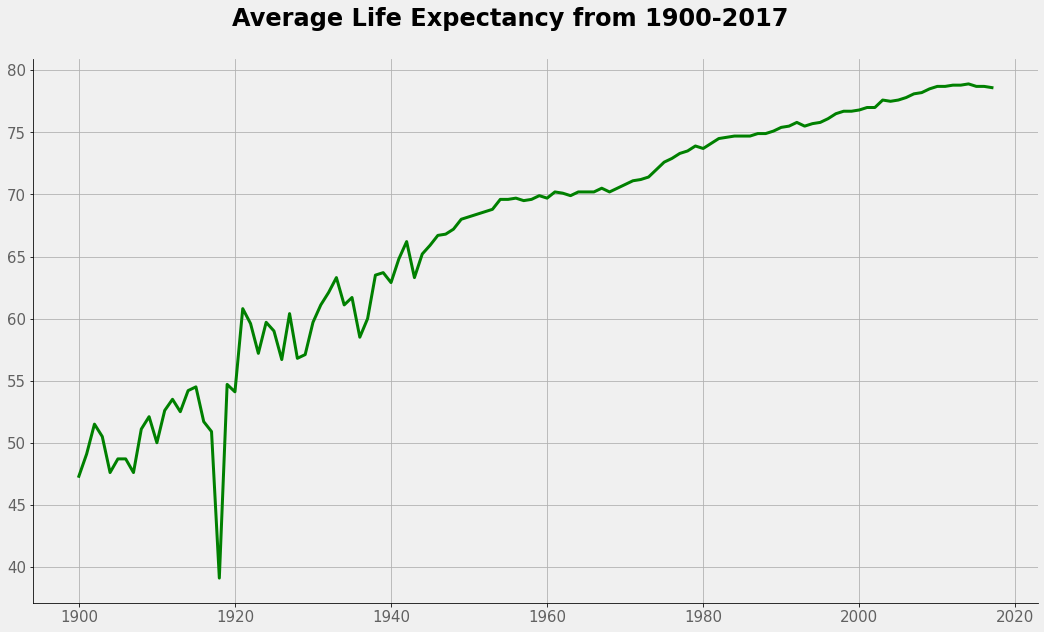

In [134]:
# Create Visualization



fig, ax = plt.subplots(figsize=(18, 10))

ax.set_title("Average Life Expectancy from 1900-2017", color='black', weight='bold', fontsize=24, x=.475, y=1.05)

ax.set_yticklabels([35,40,45,50,55,60,65,70,75,80], color='#616161', fontsize=15)
ax.set_xticklabels([1880,1900,1920,1940,1960,1980,2000,2020], color='#616161', fontsize=15)

ax.grid()
a = ax.get_ygridlines()

fig.set_facecolor('#f0f0f0')
ax.set_facecolor('#f0f0f0')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.plot(dr_le_pop['Year'],dr_le_pop['Average Life Expectancy (Years)'], color='green',linewidth=3);

In [135]:
# Create race-specific dataset

dr_le_by_race = dr_le.loc[dr_le['Sex'] == 'Both Sexes']

dr_le_by_race.head(10)

,Year,Race,Sex,Average Life Expectancy (Years),Age-adjusted Death Rate
0,1900,All Races,Both Sexes,47.3,"2,518.0"
1,1901,All Races,Both Sexes,49.1,"2,473.1"
2,1902,All Races,Both Sexes,51.5,"2,301.3"
3,1903,All Races,Both Sexes,50.5,"2,379.0"
4,1904,All Races,Both Sexes,47.6,"2,502.5"
5,1905,All Races,Both Sexes,48.7,"2,423.7"
6,1906,All Races,Both Sexes,48.7,"2,399.0"
7,1907,All Races,Both Sexes,47.6,"2,494.4"
8,1908,All Races,Both Sexes,51.1,"2,298.9"
9,1909,All Races,Both Sexes,52.1,"2,249.2"


In [136]:
# Drop Sex & Age-adjusted Death Rate column

dr_le_by_race = dr_le_by_race.drop(['Sex','Age-adjusted Death Rate'], axis=1)

dr_le_by_race.head(10)

,Year,Race,Average Life Expectancy (Years)
0,1900,All Races,47.3
1,1901,All Races,49.1
2,1902,All Races,51.5
3,1903,All Races,50.5
4,1904,All Races,47.6
5,1905,All Races,48.7
6,1906,All Races,48.7
7,1907,All Races,47.6
8,1908,All Races,51.1
9,1909,All Races,52.1


In [137]:
# Filter out data for Race: white

dr_le_white = dr_le_by_race[dr_le['Race'] == 'White']

dr_le_white.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Year,Race,Average Life Expectancy (Years)
708,1900,White,47.6
709,1901,White,49.4
710,1902,White,51.9
711,1903,White,50.9
712,1904,White,48.0
713,1905,White,49.1
714,1906,White,49.3
715,1907,White,48.1
716,1908,White,51.5
717,1909,White,52.5


In [138]:
# Filter out data for Race: black

dr_le_black = dr_le_by_race[dr_le['Race'] == 'Black']

dr_le_black.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Year,Race,Average Life Expectancy (Years)
354,1900,Black,33.0
355,1901,Black,33.7
356,1902,Black,34.6
357,1903,Black,33.1
358,1904,Black,30.8
359,1905,Black,31.3
360,1906,Black,32.9
361,1907,Black,32.5
362,1908,Black,34.9
363,1909,Black,35.7


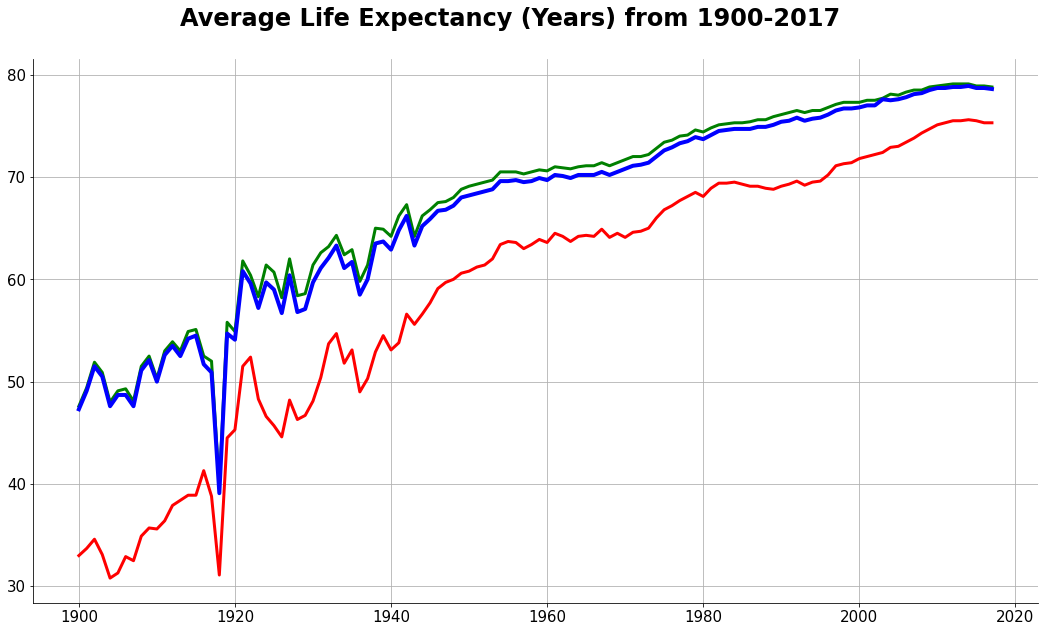

In [159]:
# Create Visualization



fig, ax = plt.subplots(figsize=(18, 10))

ax.set_title("Average Life Expectancy (Years) from 1900-2017", color='black', weight='bold', fontsize=24, x=.475, y=1.05)

ax.set_yticklabels([20,30,40,50,60,70,80], color='#000000', fontsize=15)
ax.set_xticklabels([1880,1900,1920,1940,1960,1980,2000,2020], color='#000000', fontsize=15)

ax.grid()
a = ax.get_ygridlines()

fig.set_facecolor('#FFFFFF')
ax.set_facecolor('#FFFFFF')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.plot(dr_le_white['Year'],dr_le_white['Average Life Expectancy (Years)'], color='green',linewidth=3);
ax.plot(dr_le_black['Year'],dr_le_black['Average Life Expectancy (Years)'], color='red',linewidth=3);
ax.plot(dr_le_pop['Year'],dr_le_pop['Average Life Expectancy (Years)'], color='blue',linewidth=4);

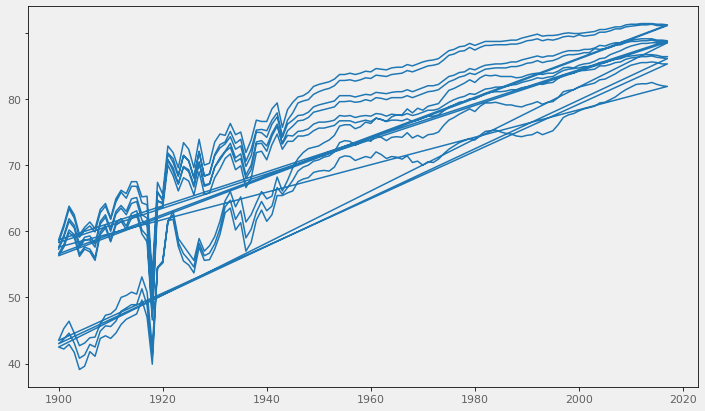

In [140]:
fig, ax = plt.subplots(figsize=(12, 7))

ax.set_yticklabels([30,40,50,60,70,80], color='#616161', fontsize=11)
ax.set_xticklabels([1880,1900,1920,1940,1960,1980,2000,2020], color='#616161', fontsize=11)

fig.set_facecolor('#f0f0f0')
ax.set_facecolor('#f0f0f0')

ax.plot(dr_le_all['Year'],dr_le_all['Average Life Expectancy (Years)']);

In [0]:
dr_le.describe(include='all')

In [0]:
# Import Age-Adjusted Death Rates for Selected Major Causes of Death

age_adj = pd.read_csv('https://raw.githubusercontent.com/KristineYW/Unit-1-Build/master/NCHS_-_Age-adjusted_Death_Rates_for_Selected_Major_Causes_of_Death.csv')

age_adj.tail()

In [0]:
# Remove last 15 rows based on irrelevance

age_adj = age_adj.iloc[:-15]


age_adj.tail()

In [0]:
age_adj.describe(include='all')

In [0]:
by_state = pd.read_csv('https://raw.githubusercontent.com/KristineYW/Unit-1-Build/master/NCHS_-_Leading_Causes_of_Death__United_States.csv')

by_state.tail()

In [0]:
data = pd.DataFrame(by_state['Age-adjusted Death Rate'])

plt.plot(by_state['Year'],by_state['State'], data=data)

plt.show

In [0]:
by_state.describe(include='all')